<a href="https://colab.research.google.com/github/guilhermelaviola/ApplicationOfDataScienceForBusiness/blob/main/Class09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks for Business**
Artificial neural networks are a key area of artificial intelligence that mimic the human brain by using interconnected neurons organized in layers, with adjustable weights that allow the system to learn from data. Different types of networks, such as feedforward, convolutional, and recurrent neural networks, are designed for specific tasks like pattern recognition, image analysis, and sequential data processing. In business, neural networks are widely applied to areas such as sales forecasting, customer segmentation, fraud detection, and sentiment analysis, where they can uncover complex patterns in large datasets. Tools like TensorFlow and PyTorch support the development and training process, which typically involves data preparation, model design, training, evaluation, and optimization. Although neural networks are highly effective and have the potential to transform many industries, their successful use depends on choosing appropriate architectures and parameters, possessing specialized expertise, and staying informed about ongoing advancements in this rapidly evolving field.

In [1]:
 # Importing all the necessary libraries and resources:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## **Example: Neural Network Forecasting**
Neural networks offer a powerful tool for forecasting and analysis in business, enabling better data-driven decision-making. Building and tuning neural network models requires a detailed understanding of the data and business objectives.

In [2]:
# Creating a random dataset for studying it:
months = pd.date_range(start='2025-01-01', periods=24, freq='M')
sales = np.random.randint(80000, 120000, size=24) * 2
df = pd.DataFrame({'Month': months, 'Sales': sales})

# Generating a DataFrame from the dataset above:
X = df[['Month']]
y = df['Sales']

/tmp/ipython-input-1467569112.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2025-01-01', periods=24, freq='M')


In [3]:
# Creating the model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting datetime to numerical format (e.g., ordinal)
X_train['Month'] = X_train['Month'].apply(lambda x: x.toordinal())
X_test['Month'] = X_test['Month'].apply(lambda x: x.toordinal())

# Normalizing the data:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Creating the Neural Network:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Training the model:
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 40240140288.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 40240132096.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 40240119808.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 40240107520.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 40240099328.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 40240087040.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 40240074752.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 40240066560.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 40240054272.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 40240046080.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 40240033792.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 40240021504.0000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 40240009216.0000
Epoch 14/100
1/1 ━━━━━━

In [6]:
# Evaluating the model:
loss = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 43050934272.0000
Loss: 43050934272.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


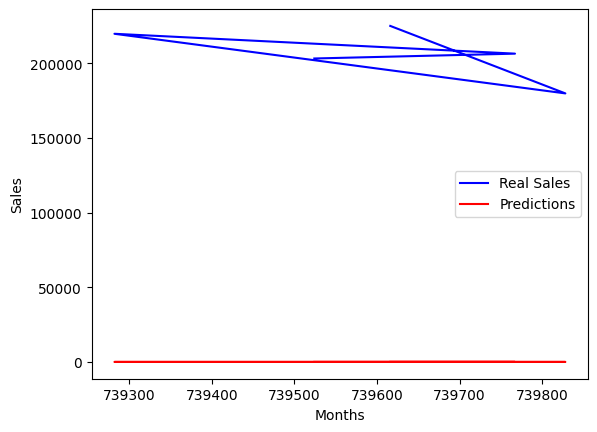

In [7]:
# Visualizing the results:
plt.plot(X_test, y_test, 'b', label='Real Sales')
plt.plot(X_test,
model.predict(X_test_scaled), 'r', label='Predictions')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.show()